**DIVISÃO DE TAREFAS:**

1.  MARCOS:
    - Importação dos dados
    - Análise dos dados
    - Predição com KNN
2.   KAUAN:
    - Pré-processamento
    - Random Forest
3.  GABRIEL:
    - Regressão logística
    - Análise Comparativa

**ETAPA DE IMPORTAÇÃO DOS DADOS**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

dataset = fetch_ucirepo(id=697)

# Extrair dados em formato pandas
X = dataset.data.features
y = dataset.data.targets

**ETAPA DE ANÁLISE DOS DADOS**

In [ ]:
# Mostrar informações básicas
print("Shape (features):", X.shape)
print("Shape (targets):", y.shape)

y = y['Target']

Shape (features): (4424, 36)
Shape (targets): (4424, 1)


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

# Juntando features e target para facilitar a análise
df = pd.concat([X, y], axis=1)

print("Tipos de dados:\n", df.dtypes)

Tipos de dados:
 Marital Status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Previous qualification (grade)                    float64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Admission grade                                   float64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int

In [ ]:
# Visualizar primeiras linhas
print("\nAmostra das features:")
print(X.head())


Amostra das features:
   Marital Status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance  Previous qualification  \
0                           1                       1   
1                           1                       1   
2                           1                       1   
3                           1                       1   
4                           0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2              

In [ ]:
print("\nAmostra dos targets:")
print(y.head())


Amostra dos targets:
0     Dropout
1    Graduate
2     Dropout
3    Graduate
4    Graduate
Name: Target, dtype: object


In [ ]:
#Verifica se o dataset possui valores ausentes
print("\nValores ausentes por coluna:\n", df.isnull().sum())


Valores ausentes por coluna:
 Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder               

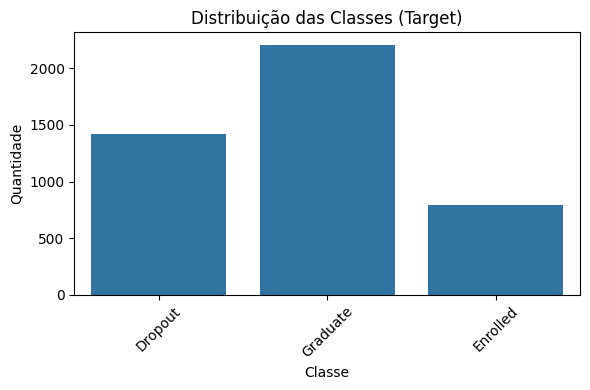

In [ ]:
# Distribuição do target (classe)
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Target')
plt.title("Distribuição das Classes (Target)")
plt.xlabel("Classe")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**ETAPA DE PRÉ-PROCESSAMENTO**

Mostrar valores únicos por coluna

In [ ]:
print(df.nunique().sort_values())

Daytime/evening attendance                          2
Displaced                                           2
Debtor                                              2
Educational special needs                           2
International                                       2
Scholarship holder                                  2
Gender                                              2
Tuition fees up to date                             2
Target                                              3
Marital Status                                      6
Application order                                   8
Inflation rate                                      9
Curricular units 2nd sem (without evaluations)     10
Unemployment rate                                  10
GDP                                                10
Curricular units 1st sem (without evaluations)     11
Course                                             17
Previous qualification                             17
Application mode            

Separando colunas categóricas e numéricas com base na cardinalidade

In [ ]:
# Colunas categóricas: até 10 valores únicos
cat_cols = [col for col in X.columns if X[col].nunique() <= 10]

# Colunas numéricas: todas as outras
num_cols = [col for col in X.columns if col not in cat_cols]

print("Colunas categóricas:", cat_cols)
print("Colunas numéricas:", num_cols)

Colunas categóricas: ['Marital Status', 'Application order', 'Daytime/evening attendance', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP']
Colunas numéricas: ['Application mode', 'Course', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Age at enrollment', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 

Colunas com valores constantes (apenas para visualização, pois não existem colunas constantes)

In [ ]:
constant_cols = X.nunique()[X.nunique() == 1].index.tolist()
print("Colunas constantes:", constant_cols)

Colunas constantes: []


Dividindo as features e target

In [ ]:
# Separa as features (X) e o target (y)
target_col = 'Target'

X = df.drop(columns=target_col)
y = df[target_col]

Criando o ColumnTransformer (OneHot + StandardScaler)

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', StandardScaler(), num_cols)
    ]
)

Dividir em treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Aplicando pré-processamento nos dados

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

print("Formato final do treino:", X_train_processed.shape)
print("Formato final do teste:", X_test_processed.shape)

Formato final do treino: (3539, 91)
Formato final do teste: (885, 91)


Versão SEM escalonamento do pré-processador

In [ ]:
preprocessor_sem_escala = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
        ('num', 'passthrough', num_cols)
    ]
)

X_train_no_scale = preprocessor_sem_escala.fit_transform(X_train)
X_test_no_scale = preprocessor_sem_escala.transform(X_test)

print("Formato (sem escala) - treino:", X_train_no_scale.shape)
print("Formato (sem escala) - teste:", X_test_no_scale.shape)

Formato (sem escala) - treino: (3539, 91)
Formato (sem escala) - teste: (885, 91)


**ETAPA DE PREDIÇÕES**

K-Nearest Neighbors (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Estratégia de validação cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

knn_model = KNeighborsClassifier()

param_grid_knn = {
    'classifier__n_neighbors': [3, 5, 7, 9, 11, 13],
    'classifier__weights': ['uniform', 'distance']
}

# Pipeline com pré-processamento e modelo
pipeline_knn = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', knn_model)
])

print("Iniciando busca de hiperparâmetros para KNN com validação cruzada...")

grid_search_knn = GridSearchCV(
    estimator=pipeline_knn,
    param_grid=param_grid_knn,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

# Ajuste do modelo
grid_search_knn.fit(X_train, y_train)

print("Busca de hiperparâmetros concluída!")
print("Melhores hiperparâmetros:", grid_search_knn.best_params_)
print(f"Acurácia média na validação cruzada: {grid_search_knn.best_score_:.4f}")

# Avaliação no conjunto de treino
print("Avaliando o melhor modelo no conjunto de teste...")
best_knn = grid_search_knn.best_estimator_
y_pred_knn = best_knn.predict(X_test)

# Métricas
accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print(f"Acurácia no teste: {accuracy_knn:.4f}")
print("Classification Report:\n", report_knn)

# Matriz de confusão
class_names = ['Dropout (0)', 'Enrolled (1)', 'Graduated (2)']
conf_matrix_df = pd.DataFrame(conf_matrix_knn, index=class_names, columns=class_names)

print("Matriz de Confusão (com rótulos):")
print(conf_matrix_df)

Iniciando busca de hiperparâmetros para KNN com validação cruzada...
Busca de hiperparâmetros concluída!
Melhores hiperparâmetros: {'classifier__n_neighbors': 13, 'classifier__weights': 'uniform'}
Acurácia média na validação cruzada: 0.7107
Avaliando o melhor modelo no conjunto de teste...
Acurácia no teste: 0.6949
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.81      0.60      0.69       284
    Enrolled       0.38      0.18      0.25       159
    Graduate       0.70      0.94      0.80       442

    accuracy                           0.69       885
   macro avg       0.63      0.57      0.58       885
weighted avg       0.67      0.69      0.66       885

Matriz de Confusão (com rótulos):
               Dropout (0)  Enrolled (1)  Graduated (2)
Dropout (0)            170            32             82
Enrolled (1)            30            29            100
Graduated (2)           11            15            416


Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Estratégia de validação cruzada estratificada
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Modelo base
lr_model = LogisticRegression(solver='liblinear', random_state=42, max_iter=1000)

# Grade de hiperparâmetros para LogReg
param_grid_lr = {
    'classifier__C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'classifier__penalty': ['l1', 'l2']
}

# Pipeline com pré-processamento + LogReg
pipeline_lr = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', lr_model)
])

# GridSearchCV para LogReg
grid_search_lr = GridSearchCV(
    estimator=pipeline_lr,
    param_grid=param_grid_lr,
    cv=cv_strategy,
    scoring='accuracy',
    n_jobs=-1
)

print("Buscando melhores hiperparâmetros para Regressão Logística...")
grid_search_lr.fit(X_train, y_train)

# Avaliação
print("Regressão Logística:")
print("Melhores hiperparâmetros:", grid_search_lr.best_params_)
print(f"Acurácia média (validação cruzada): {grid_search_lr.best_score_:.4f}")

best_lr = grid_search_lr.best_estimator_
y_pred_lr = best_lr.predict(X_test)

print(f"\nAcurácia no teste: {accuracy_score(y_test, y_pred_lr):.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred_lr))

Buscando melhores hiperparâmetros para Regressão Logística...
Regressão Logística:
Melhores hiperparâmetros: {'classifier__C': 1.0, 'classifier__penalty': 'l1'}
Acurácia média (validação cruzada): 0.7649

Acurácia no teste: 0.7650
Classification Report:
               precision    recall  f1-score   support

     Dropout       0.80      0.77      0.78       284
    Enrolled       0.53      0.26      0.35       159
    Graduate       0.78      0.94      0.86       442

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.66       885
weighted avg       0.74      0.76      0.74       885

Matriz de Confusão:
 [[219  22  43]
 [ 45  42  72]
 [ 11  15 416]]


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline

# Define o algoritmo
rf_model = RandomForestClassifier(random_state=42)

# Define diferentes hiperparâmetros para Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100, 200, 300], # Número de árvores na floresta
    'classifier__max_depth': [None, 10, 20, 30], # Profundidade máxima da árvore
    'classifier__min_samples_leaf': [1, 2, 4], # Número mínimo de amostras em uma folha
}

pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', rf_model)])

print("Iniciando a busca de hiperparâmetros para Random Forest com validação cruzada...")

grid_search_rf = GridSearchCV(pipeline_rf,
                              param_grid=param_grid_rf,
                              cv=cv_strategy,
                              scoring='accuracy',
                              n_jobs=-1)

grid_search_rf.fit(X_train, y_train)

print("\nBusca de hiperparâmetros para Random Forest concluída.")
print(f"Melhores hiperparâmetros para Random Forest: {grid_search_rf.best_params_}")
print(f"Melhor score de validação cruzada para Random Forest: {grid_search_rf.best_score_:.4f}")

# Pipeline com os melhores hiperparâmetros
best_rf_model = grid_search_rf.best_estimator_

# Avalia o melhor modelo no conjunto de teste
print("\nAvaliando o melhor modelo de Random Forest no conjunto de teste...")
y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Accuracy de Random Forest no conjunto de teste: {accuracy_rf:.4f}")
print("Classification Report de Random Forest no conjunto de teste:\n", report_rf)
print("Confusion Matrix de Random Forest no conjunto de teste:\n", conf_matrix_rf)

Iniciando a busca de hiperparâmetros para Random Forest com validação cruzada...

Busca de hiperparâmetros para Random Forest concluída.
Melhores hiperparâmetros para Random Forest: {'classifier__max_depth': 20, 'classifier__min_samples_leaf': 2, 'classifier__n_estimators': 100}
Melhor score de validação cruzada para Random Forest: 0.7768

Avaliando o melhor modelo de Random Forest no conjunto de teste...
Accuracy de Random Forest no conjunto de teste: 0.7684
Classification Report de Random Forest no conjunto de teste:
               precision    recall  f1-score   support

     Dropout       0.80      0.77      0.79       284
    Enrolled       0.58      0.31      0.41       159
    Graduate       0.78      0.93      0.85       442

    accuracy                           0.77       885
   macro avg       0.72      0.67      0.68       885
weighted avg       0.75      0.77      0.75       885

Confusion Matrix de Random Forest no conjunto de teste:
 [[220  17  47]
 [ 41  50  68]
 [ 13 

Treinando os modelos com dados SEM escalonamento

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_no_scale, y_train)
print("Random Forest (sem escala) — Avaliação no teste:")
print(classification_report(y_test, rf.predict(X_test_no_scale)))

# KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_no_scale, y_train)
print("KNN (sem escala) — Avaliação no teste:")
print(classification_report(y_test, knn.predict(X_test_no_scale)))

# Regressão Logística
lr = LogisticRegression(solver='saga', max_iter=3000)
lr.fit(X_train_no_scale, y_train)
print("Regressão Logística (sem escala) — Avaliação no teste:")
print(classification_report(y_test, lr.predict(X_test_no_scale)))

Random Forest (sem escala) — Avaliação no teste:
              precision    recall  f1-score   support

     Dropout       0.80      0.75      0.78       284
    Enrolled       0.52      0.33      0.41       159
    Graduate       0.78      0.91      0.84       442

    accuracy                           0.76       885
   macro avg       0.70      0.67      0.68       885
weighted avg       0.74      0.76      0.74       885

KNN (sem escala) — Avaliação no teste:
              precision    recall  f1-score   support

     Dropout       0.57      0.55      0.56       284
    Enrolled       0.31      0.24      0.27       159
    Graduate       0.66      0.73      0.69       442

    accuracy                           0.58       885
   macro avg       0.51      0.51      0.51       885
weighted avg       0.57      0.58      0.57       885

Regressão Logística (sem escala) — Avaliação no teste:
              precision    recall  f1-score   support

     Dropout       0.80      0.68      0

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


**ANÁLISE COMPARATIVA**

Comparação de Métricas dos Modelos (baseado no conjunto de teste):
                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.764972   0.703812  0.658818  0.663857
KNN                  0.694915   0.627639  0.574053  0.577892
Random Forest        0.768362   0.721756  0.672238  0.681559


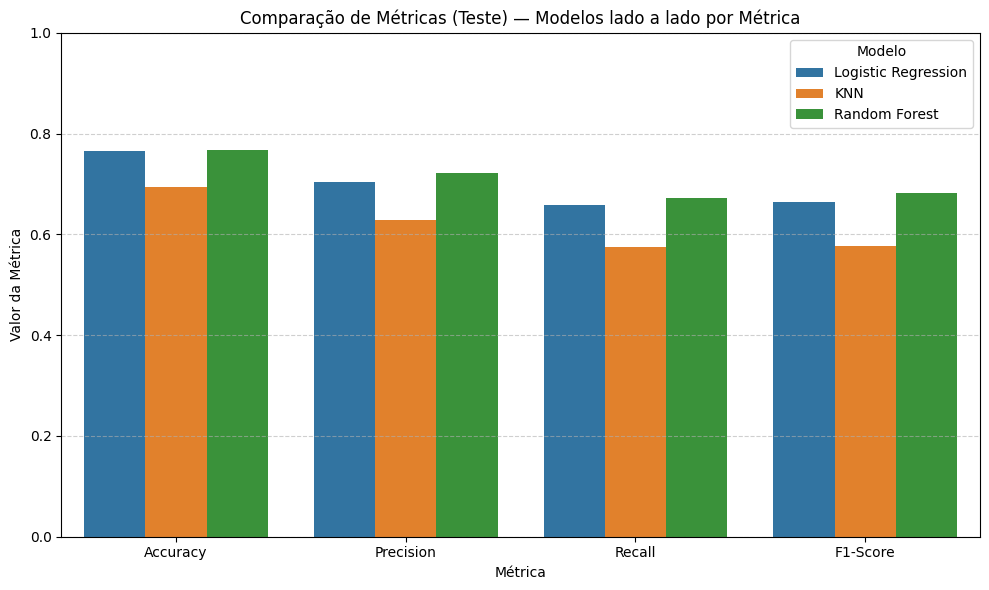

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report

# Gera classification_report com base no CONJUNTO DE TESTE
report_lr_dict = classification_report(y_test, y_pred_lr, output_dict=True)
report_knn_dict = classification_report(y_test, y_pred_knn, output_dict=True)
report_rf_dict = classification_report(y_test, y_pred_rf, output_dict=True)

# Dicionário para armazenar as métricas por modelo
model_comparison_test = {
    'Logistic Regression': {
        'Accuracy': report_lr_dict['accuracy'],
        'Precision': report_lr_dict['macro avg']['precision'],
        'Recall': report_lr_dict['macro avg']['recall'],
        'F1-Score': report_lr_dict['macro avg']['f1-score']
    },
    'KNN': {
        'Accuracy': report_knn_dict['accuracy'],
        'Precision': report_knn_dict['macro avg']['precision'],
        'Recall': report_knn_dict['macro avg']['recall'],
        'F1-Score': report_knn_dict['macro avg']['f1-score']
    },
    'Random Forest': {
        'Accuracy': report_rf_dict['accuracy'],
        'Precision': report_rf_dict['macro avg']['precision'],
        'Recall': report_rf_dict['macro avg']['recall'],
        'F1-Score': report_rf_dict['macro avg']['f1-score']
    }
}

comparison_df = pd.DataFrame(model_comparison_test).T

print("Comparação de Métricas dos Modelos (baseado no conjunto de teste):")
print(comparison_df)

comparison_df_plot = comparison_df.T.reset_index().melt(id_vars='index', var_name='Modelo', value_name='Valor')
comparison_df_plot.rename(columns={'index': 'Métrica'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=comparison_df_plot, x='Métrica', y='Valor', hue='Modelo')
plt.title("Comparação de Métricas (Teste) — Modelos lado a lado por Métrica")
plt.ylim(0, 1.0)
plt.ylabel("Valor da Métrica")
plt.xlabel("Métrica")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(title="Modelo")
plt.tight_layout()
plt.show()

Comparação de Métricas dos Modelos (baseado no conjunto de teste):
                                  Accuracy  Precision    Recall  F1-Score
Logistic Regression (Scaled)      0.761582   0.696575  0.652529  0.655634
Logistic Regression (No Scaling)  0.759322   0.689560  0.644225  0.643200
KNN (Scaled)                      0.667797   0.586039  0.573488  0.576354
KNN (No Scaling)                  0.583051   0.513270  0.505599  0.507099
Random Forest (Scaled)            0.760452   0.707109  0.670231  0.679443
Random Forest (No Scaling)        0.758192   0.703062  0.666961  0.675847


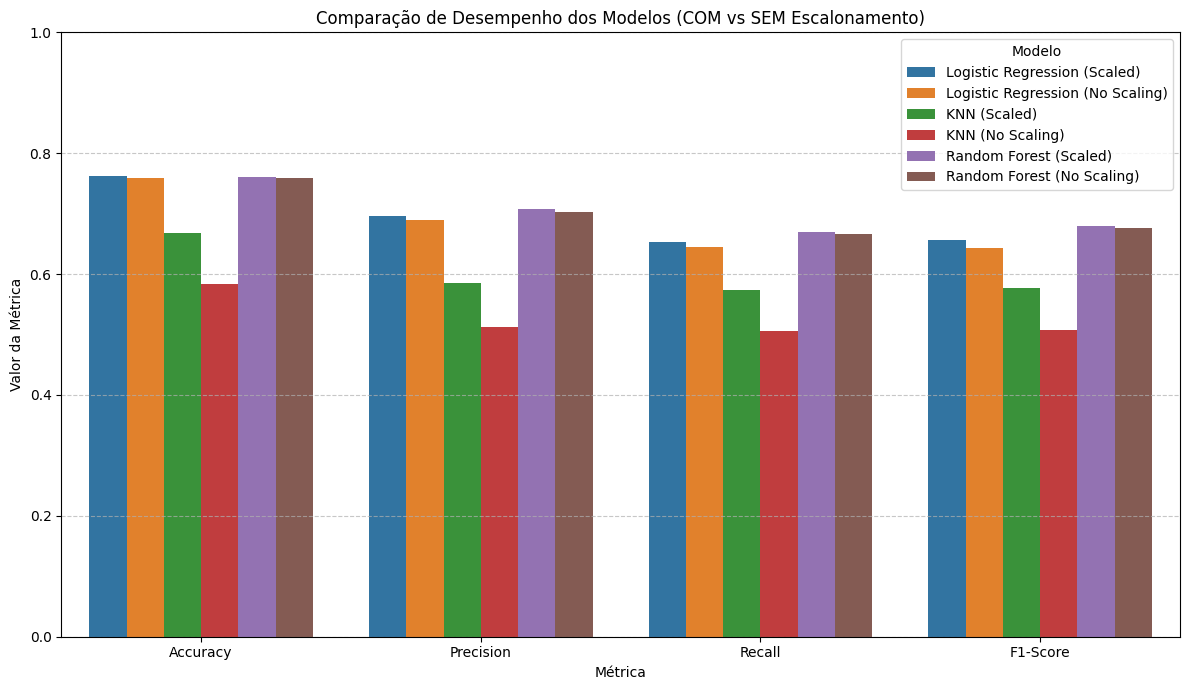

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Pré-processador COM escalonamento
preprocessor_scaled = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ('num', StandardScaler(), num_cols)
])

# Pré-processador SEM escalonamento
preprocessor_no_scaling = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_cols),
    ('num', 'passthrough', num_cols)
])

# Dicionário para armazenar as métricas
scaling_comparison = {}


# Com escalonamento
pipeline_lr_scaled = Pipeline([
    ('preprocessor', preprocessor_scaled),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])
pipeline_lr_scaled.fit(X_train, y_train)
y_pred_lr_scaled = pipeline_lr_scaled.predict(X_test)
report_lr_scaled = classification_report(y_test, y_pred_lr_scaled, output_dict=True)

# Sem escalonamento
pipeline_lr_no_scale = Pipeline([
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))
])
pipeline_lr_no_scale.fit(X_train, y_train)
y_pred_lr_no_scale = pipeline_lr_no_scale.predict(X_test)
report_lr_no_scale = classification_report(y_test, y_pred_lr_no_scale, output_dict=True)

# Armazena as métricas
scaling_comparison['Logistic Regression (Scaled)'] = {
    'Accuracy': report_lr_scaled['accuracy'],
    'Precision': report_lr_scaled['macro avg']['precision'],
    'Recall': report_lr_scaled['macro avg']['recall'],
    'F1-Score': report_lr_scaled['macro avg']['f1-score']
}
scaling_comparison['Logistic Regression (No Scaling)'] = {
    'Accuracy': report_lr_no_scale['accuracy'],
    'Precision': report_lr_no_scale['macro avg']['precision'],
    'Recall': report_lr_no_scale['macro avg']['recall'],
    'F1-Score': report_lr_no_scale['macro avg']['f1-score']
}

# Com escalonamento
pipeline_knn_scaled = Pipeline([
    ('preprocessor', preprocessor_scaled),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn_scaled.fit(X_train, y_train)
y_pred_knn_scaled = pipeline_knn_scaled.predict(X_test)
report_knn_scaled = classification_report(y_test, y_pred_knn_scaled, output_dict=True)

# Sem escalonamento
pipeline_knn_no_scale = Pipeline([
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn_no_scale.fit(X_train, y_train)
y_pred_knn_no_scale = pipeline_knn_no_scale.predict(X_test)
report_knn_no_scale = classification_report(y_test, y_pred_knn_no_scale, output_dict=True)

# Armazena as métricas
scaling_comparison['KNN (Scaled)'] = {
    'Accuracy': report_knn_scaled['accuracy'],
    'Precision': report_knn_scaled['macro avg']['precision'],
    'Recall': report_knn_scaled['macro avg']['recall'],
    'F1-Score': report_knn_scaled['macro avg']['f1-score']
}
scaling_comparison['KNN (No Scaling)'] = {
    'Accuracy': report_knn_no_scale['accuracy'],
    'Precision': report_knn_no_scale['macro avg']['precision'],
    'Recall': report_knn_no_scale['macro avg']['recall'],
    'F1-Score': report_knn_no_scale['macro avg']['f1-score']
}

# Com escalonamento
pipeline_rf_scaled = Pipeline([
    ('preprocessor', preprocessor_scaled),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_rf_scaled.fit(X_train, y_train)
y_pred_rf_scaled = pipeline_rf_scaled.predict(X_test)
report_rf_scaled = classification_report(y_test, y_pred_rf_scaled, output_dict=True)

# Sem escalonamento
pipeline_rf_no_scale = Pipeline([
    ('preprocessor', preprocessor_no_scaling),
    ('classifier', RandomForestClassifier(random_state=42))
])
pipeline_rf_no_scale.fit(X_train, y_train)
y_pred_rf_no_scale = pipeline_rf_no_scale.predict(X_test)
report_rf_no_scale = classification_report(y_test, y_pred_rf_no_scale, output_dict=True)

# Armazena as métricas
scaling_comparison['Random Forest (Scaled)'] = {
    'Accuracy': report_rf_scaled['accuracy'],
    'Precision': report_rf_scaled['macro avg']['precision'],
    'Recall': report_rf_scaled['macro avg']['recall'],
    'F1-Score': report_rf_scaled['macro avg']['f1-score']
}
scaling_comparison['Random Forest (No Scaling)'] = {
    'Accuracy': report_rf_no_scale['accuracy'],
    'Precision': report_rf_no_scale['macro avg']['precision'],
    'Recall': report_rf_no_scale['macro avg']['recall'],
    'F1-Score': report_rf_no_scale['macro avg']['f1-score']
}

df_comparacao = pd.DataFrame(scaling_comparison).T

print("Comparação de Métricas dos Modelos (baseado no conjunto de teste):")
print(df_comparacao)

# Reorganiza para gráfico com métricas no eixo X
df_plot = df_comparacao.reset_index().melt(id_vars='index', var_name='Métrica', value_name='Valor')
df_plot.rename(columns={'index': 'Modelo'}, inplace=True)

# Gráfico
plt.figure(figsize=(12, 7))
sns.barplot(data=df_plot, x='Métrica', y='Valor', hue='Modelo')
plt.title("Comparação de Desempenho dos Modelos (COM vs SEM Escalonamento)")
plt.ylabel("Valor da Métrica")
plt.ylim(0, 1.0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.legend(title="Modelo", loc='upper right')
plt.tight_layout()
plt.show()